In [1]:
!pip install GEOparse

In [2]:
import os
import gzip
import shutil

# Устанавливаем папку для загрузки
os.makedirs("geo_data", exist_ok=True)

# Пути к файлам
soft_gz_path = "geo_data/GSE113486_family.soft.gz"
soft_path = "geo_data/GSE113486_family.soft"

# Распаковка файла
if os.path.exists(soft_gz_path):
    with gzip.open(soft_gz_path, 'rb') as f_in:
        with open(soft_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Файл {soft_gz_path} успешно распакован.")
else:
    print(f"Файл {soft_gz_path} не найден.")

Файл geo_data/GSE113486_family.soft.gz не найден.


In [3]:
import GEOparse

# Загружаем данные из GEO
geo_id = "GSE113486"
geo_data = GEOparse.get_GEO(geo=geo_id, destdir="geo_data")

# Проверяем доступные платформы
print(f"Доступные платформы: {list(geo_data.gpls.keys())}")

26-Feb-2025 01:33:33 DEBUG utils - Directory geo_data already exists. Skipping.
DEBUG:GEOparse:Directory geo_data already exists. Skipping.
26-Feb-2025 01:33:33 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113486/soft/GSE113486_family.soft.gz to geo_data/GSE113486_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113486/soft/GSE113486_family.soft.gz to geo_data/GSE113486_family.soft.gz
100%|██████████| 13.0M/13.0M [00:02<00:00, 5.37MB/s]
26-Feb-2025 01:33:36 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
26-Feb-2025 01:33:36 DEBUG downloader - Moving /tmp/tmphcw5eg__ to /content/geo_data/GSE113486_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmphcw5eg__ to /content/geo_data/GSE113486_family.soft.gz
26-Feb-2025 01:33:36 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113486/soft/GSE113486_family.soft.gz
DEBUG:GEOparse:Successfully downlo

Доступные платформы: ['GPL21263']


In [4]:
import pandas as pd

# Получаем экспрессионные данные из платформы
if geo_data.gpls:
    platform = list(geo_data.gpls.keys())[0]  # Берем первую платформу
    expression_data = geo_data.gpls[platform].table
    print(f"Форма данных платформы: {expression_data.shape}")
else:
    raise ValueError("Не удалось найти платформу с экспрессионными данными.")

# Вывод первых строк данных
print("Первые 5 строк таблицы экспрессии:")
print(expression_data.head())

Форма данных платформы: (2565, 3)
Первые 5 строк таблицы экспрессии:
             ID         miRNA  miRNA_ID_LIST
0  MIMAT0000062  MIMAT0000062  hsa-let-7a-5p
1  MIMAT0000063  MIMAT0000063  hsa-let-7b-5p
2  MIMAT0000064  MIMAT0000064  hsa-let-7c-5p
3  MIMAT0000065  MIMAT0000065  hsa-let-7d-5p
4  MIMAT0000066  MIMAT0000066  hsa-let-7e-5p


In [5]:
# Используем 'miRNA_ID_LIST' как индекс, если он существует
if "miRNA_ID_LIST" in expression_data.columns:
    expression_data = expression_data.set_index("miRNA_ID_LIST")
    print("Установлен индекс: 'miRNA_ID_LIST'")
else:
    raise ValueError("Колонка 'miRNA_ID_LIST' не найдена в данных.")

# Преобразование значений в числовые и заполнение пропусков
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')
expression_data.fillna(expression_data.median(), inplace=True)

# Нормализация (Z-score)
expression_data = (expression_data - expression_data.mean()) / expression_data.std()

Установлен индекс: 'miRNA_ID_LIST'


In [6]:
print(expression_data.columns)
print(expression_data.dtypes.value_counts())

Index(['ID', 'miRNA'], dtype='object')
float64    2
Name: count, dtype: int64


In [7]:
print(geo_data.gpls.keys())
print(dir(geo_data.gpls[platform]))

dict_keys(['GPL21263'])
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__metaclass__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_columns_as_string', '_get_metadata_as_string', '_get_object_as_soft', '_get_table_as_string', 'columns', 'database', 'geotype', 'get_accession', 'get_metadata_attribute', 'get_type', 'gses', 'gsms', 'head', 'metadata', 'name', 'relations', 'show_columns', 'show_metadata', 'show_table', 'table', 'to_soft']


In [8]:
if geo_data.gpls:
    platform = list(geo_data.gpls.keys())[0]
    print(geo_data.gpls[platform].table.head())
else:
    print("Нет доступных платформ.")

             ID         miRNA  miRNA_ID_LIST
0  MIMAT0000062  MIMAT0000062  hsa-let-7a-5p
1  MIMAT0000063  MIMAT0000063  hsa-let-7b-5p
2  MIMAT0000064  MIMAT0000064  hsa-let-7c-5p
3  MIMAT0000065  MIMAT0000065  hsa-let-7d-5p
4  MIMAT0000066  MIMAT0000066  hsa-let-7e-5p


In [9]:
print(geo_data.phenotype_data.head())

                              title geo_accession                 status  \
GSM3106847  Bladder Cancer [BL0001]    GSM3106847  Public on Nov 06 2018   
GSM3106848  Bladder Cancer [BL0003]    GSM3106848  Public on Nov 06 2018   
GSM3106849  Bladder Cancer [BL0004]    GSM3106849  Public on Nov 06 2018   
GSM3106850  Bladder Cancer [BL0007]    GSM3106850  Public on Nov 06 2018   
GSM3106851  Bladder Cancer [BL0008]    GSM3106851  Public on Nov 06 2018   

           submission_date last_update_date type channel_count  \
GSM3106847     Apr 20 2018      Nov 06 2018  RNA             1   
GSM3106848     Apr 20 2018      Nov 06 2018  RNA             1   
GSM3106849     Apr 20 2018      Nov 06 2018  RNA             1   
GSM3106850     Apr 20 2018      Nov 06 2018  RNA             1   
GSM3106851     Apr 20 2018      Nov 06 2018  RNA             1   

           source_name_ch1  organism_ch1 taxid_ch1  ...  \
GSM3106847           Serum  Homo sapiens      9606  ...   
GSM3106848           Serum  

In [10]:
print("Доступные метаданные:")
print(geo_data.gpls[platform].show_metadata())

print("Доступные колонки в таблице:")
print(geo_data.gpls[platform].show_columns())

print("Первые строки таблицы:")
print(geo_data.gpls[platform].table.head())

Доступные метаданные:
!D_title = 3D-Gene Human miRNA V21_1.0.0
!D_geo_accession = GPL21263
!D_status = Public on Dec 19 2015
!D_submission_date = Dec 18 2015
!D_last_update_date = Jan 24 2019
!D_technology = spotted oligonucleotide
!D_distribution = commercial
!D_organism = Homo sapiens
!D_taxid = 9606
!D_manufacturer = Toray Industries,Inc.
!D_manufacture_protocol = See manufacture's web site
!D_contact_name = Satoshi,,Kondo
!D_contact_department = New Projects Development Division
!D_contact_institute = Toray Industries,Inc.
!D_contact_address = Tebiro 6-10-1
!D_contact_city = Kamakura
!D_contact_state = Kanagawa
!D_contact_zip/postal_code = 248-8555
!D_contact_country = Japan
!D_data_row_count = 2565
None
Доступные колонки в таблице:
                                                     description
ID                                                              
miRNA                                                           
miRNA_ID_LIST  LINK_PRE:"http://www.mirbase.org/cgi-bin/mi

In [11]:
print(expression_data.dtypes.value_counts())
print(expression_data.sample(10))
print(geo_data.phenotype_data.head())

float64    2
Name: count, dtype: int64
                 ID  miRNA
miRNA_ID_LIST             
hsa-miR-4444    NaN    NaN
hsa-miR-764     NaN    NaN
hsa-miR-6772-3p NaN    NaN
hsa-miR-6829-3p NaN    NaN
hsa-miR-500b-3p NaN    NaN
hsa-miR-3688-3p NaN    NaN
hsa-miR-941     NaN    NaN
hsa-miR-4480    NaN    NaN
hsa-miR-627-3p  NaN    NaN
hsa-miR-4678    NaN    NaN
                              title geo_accession                 status  \
GSM3106847  Bladder Cancer [BL0001]    GSM3106847  Public on Nov 06 2018   
GSM3106848  Bladder Cancer [BL0003]    GSM3106848  Public on Nov 06 2018   
GSM3106849  Bladder Cancer [BL0004]    GSM3106849  Public on Nov 06 2018   
GSM3106850  Bladder Cancer [BL0007]    GSM3106850  Public on Nov 06 2018   
GSM3106851  Bladder Cancer [BL0008]    GSM3106851  Public on Nov 06 2018   

           submission_date last_update_date type channel_count  \
GSM3106847     Apr 20 2018      Nov 06 2018  RNA             1   
GSM3106848     Apr 20 2018      Nov 06 2018  RNA

In [12]:
# Проверим, какие ключи есть в geo_data.gsms
print(f"Количество образцов: {len(geo_data.gsms)}")
print("Пример одного образца:")
sample_id = list(geo_data.gsms.keys())[0]
print(geo_data.gsms[sample_id].table.head())

Количество образцов: 972
Пример одного образца:
         ID_REF  VALUE
0  MIMAT0004502 -1.061
1  MIMAT0004501 -1.061
2  MIMAT0002844 -1.061
3  MIMAT0002843 -1.061
4  MIMAT0002824  5.793


In [13]:
# Создаём пустой список для хранения экспрессии
expression_data_list = []

# Перебираем все образцы (GSM)
for gsm_id, gsm in geo_data.gsms.items():
    df = gsm.table  # Получаем таблицу значений
    df = df.set_index("ID_REF")  # Используем ID_REF как индекс
    df = df.rename(columns={"VALUE": gsm_id})  # Переименовываем колонку с экспрессией
    expression_data_list.append(df)

# Объединяем все образцы в одну таблицу
expression_data = pd.concat(expression_data_list, axis=1)

# Выводим форму итоговой таблицы
print(f"Форма итоговой матрицы экспрессии: {expression_data.shape}")
print(expression_data.head())

Форма итоговой матрицы экспрессии: (2565, 972)
              GSM3106847  GSM3106848  GSM3106849  GSM3106850  GSM3106851  \
ID_REF                                                                     
MIMAT0004502      -1.061       2.992       3.017       3.776       4.533   
MIMAT0004501      -1.061       0.765       0.667       2.852       5.968   
MIMAT0002844      -1.061       3.283       3.785       4.210       1.237   
MIMAT0002843      -1.061       0.765      -1.492       0.867       1.237   
MIMAT0002824       5.793       5.667       4.739       6.900       6.989   

              GSM3106852  GSM3106853  GSM3106854  GSM3106855  GSM3106856  ...  \
ID_REF                                                                    ...   
MIMAT0004502       1.882       4.846       1.320       2.783       1.478  ...   
MIMAT0004501      -0.486       1.510       1.320       0.195       5.933  ...   
MIMAT0002844       3.672       4.619       5.606       4.289       4.086  ...   
MIMAT0002843   

In [14]:
# Выводим список доступных метаданных для одного образца
sample_id = list(geo_data.gsms.keys())[0]  # Берем первый образец
print(geo_data.gsms[sample_id].metadata.keys())
print(geo_data.gsms[sample_id].metadata.get("characteristics_ch1", "Нет данных"))
print(geo_data.gsms[sample_id].metadata.get("source_name_ch1", "Нет данных"))

dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_institute', 'contact_address', 'contact_city', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'series_id', 'data_row_count'])
['tissue: Serum', 'Sex: Male', 'age: 59', 'disease status: Bladder Cancer', 'pathological tstage: <pT2', 'pathological grade: low']
['Serum']


In [15]:
tumor_samples = []
normal_samples = []

for gsm_id, gsm in geo_data.gsms.items():
    characteristics = gsm.metadata.get("characteristics_ch1", [])

    # Проверяем каждую характеристику на статус заболевания
    for char in characteristics:
        char = char.lower()  # Приводим к нижнему регистру для унификации
        if "disease status: bladder cancer" in char:
            tumor_samples.append(gsm_id)
        elif "disease status: normal" in char or "healthy" in char:
            normal_samples.append(gsm_id)

print(f"Опухолевые образцы: {len(tumor_samples)}, Нормальные образцы: {len(normal_samples)}")

Опухолевые образцы: 392, Нормальные образцы: 0


In [16]:
# Смотрим все уникальные значения характеристик
unique_values = set()
for gsm in geo_data.gsms.values():
    characteristics = gsm.metadata.get("characteristics_ch1", [])
    for char in characteristics:
        unique_values.add(char.lower())  # Приводим к нижнему регистру для унификации

print("Уникальные значения characteristics_ch1:")
print(unique_values)

Уникальные значения characteristics_ch1:
{'age: 49', 'age: 32', 'age: 46', 'pathological grade: high', 'age: 71', 'disease status: non-cancer control', 'disease status: bladder cancer', 'age: 88', 'disease status: prostate cancer', 'disease status: hepatocellular carcinoma', 'age: 44', 'age: 31', 'age: 51', 'age: 85', 'disease status: lung cancer', 'age: 89', 'age: 73', 'age: 86', 'age: 38', 'age: 68', 'age: 43', 'age: 56', 'pathological grade: low', 'age: 80', 'age: 26', 'disease status: ovarian cancer', 'age: 50', 'age: 67', 'age: 64', 'age: 24', 'age: 76', 'age: 61', 'age: 36', 'age: 74', 'age: 60', 'tissue: serum', 'age: 29', 'age: 82', 'age: 53', 'age: 83', 'age: 75', 'age: 28', 'age: 40', 'disease status: gastric cancer', 'age: 72', 'age: 41', 'age: 39', 'age: 54', 'age: 55', 'age: 47', 'age: 70', 'age: 66', 'pathological tstage: na', 'age: 93', 'age: 35', 'age: 33', 'disease status: colorectal cancer', 'age: 42', 'disease status: pancreatic cancer', 'age: 65', 'pathological tsta

In [17]:
tumor_samples = []
normal_samples = []

for gsm_id, gsm in geo_data.gsms.items():
    characteristics = gsm.metadata.get("characteristics_ch1", [])

    for char in characteristics:
        char = char.lower()  # Приводим к нижнему регистру для удобства сравнения

        if "disease status: non-cancer control" in char:
            normal_samples.append(gsm_id)
        elif "disease status:" in char and "non-cancer control" not in char:
            tumor_samples.append(gsm_id)

print(f"Опухолевые образцы: {len(tumor_samples)}, Нормальные образцы: {len(normal_samples)}")

Опухолевые образцы: 872, Нормальные образцы: 100


In [18]:
import numpy as np

# Создаём DataFrame с экспрессией только для наших образцов
expression_matrix = geo_data.pivot_samples("VALUE")

# Разделяем на опухолевые и нормальные образцы
tumor_expr = expression_matrix[tumor_samples]
normal_expr = expression_matrix[normal_samples]

# Рассчитываем статистики
tumor_mean = tumor_expr.mean(axis=1)
tumor_std = tumor_expr.std(axis=1)
normal_mean = normal_expr.mean(axis=1)
normal_std = normal_expr.std(axis=1)

# Объединяем статистику в один DataFrame
summary_stats = pd.DataFrame({
    "Tumor_Mean": tumor_mean,
    "Tumor_Std": tumor_std,
    "Normal_Mean": normal_mean,
    "Normal_Std": normal_std
})

# Выводим первые строки
print(summary_stats.head())

              Tumor_Mean  Tumor_Std  Normal_Mean  Normal_Std
ID_REF                                                      
MIMAT0000062    3.138869   2.485258     -0.39897    3.218840
MIMAT0000063    3.316381   2.529610      1.17095    2.510291
MIMAT0000064    2.796526   2.563097     -0.85993    3.067781
MIMAT0000065    2.995388   2.573929     -0.43783    3.205459
MIMAT0000066    2.022411   2.380501     -1.10699    2.729627


In [19]:
from scipy.stats import ttest_ind

# Выполняем t-тест для каждого miRNA
p_values = ttest_ind(tumor_expr.T, normal_expr.T, equal_var=False, nan_policy='omit')[1]

# Добавляем p-value в таблицу
summary_stats["p_value"] = p_values

# Сортируем по значимости
summary_stats = summary_stats.sort_values(by="p_value")

# Выводим первые строки отсортированной таблицы
print(summary_stats.head(10))

              Tumor_Mean  Tumor_Std  Normal_Mean  Normal_Std        p_value
ID_REF                                                                     
MIMAT0019947    8.209356   1.360250      5.29784    0.326907  2.445557e-224
MIMAT0015064    5.542531   1.458599      8.02794    0.394278  1.265492e-156
MIMAT0005866    4.139508   1.975395      6.65579    0.369995  8.629146e-152
MIMAT0005951    8.195003   1.368868      5.35510    0.494731  3.735324e-132
MIMAT0027614    2.965804   2.225281      5.71592    0.536045  1.307175e-120
MIMAT0019071   13.623422   1.220014     11.19383    0.462169  8.919880e-120
MIMAT0019710    2.618775   2.309214      5.63504    0.635507  2.959844e-113
MIMAT0027474    9.342542   0.803442      7.93360    0.300468  4.954639e-108
MIMAT0019229   11.035920   0.397033     12.10378    0.199412  5.123107e-107
MIMAT0003326   12.372509   0.583697     10.47949    0.351270   3.654069e-99


Tumor samples: 872
Normal samples: 100


<ipython-input-22-7785dc787f0e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Expression', data=data, palette={"Tumor": "red", "Normal": "blue"})


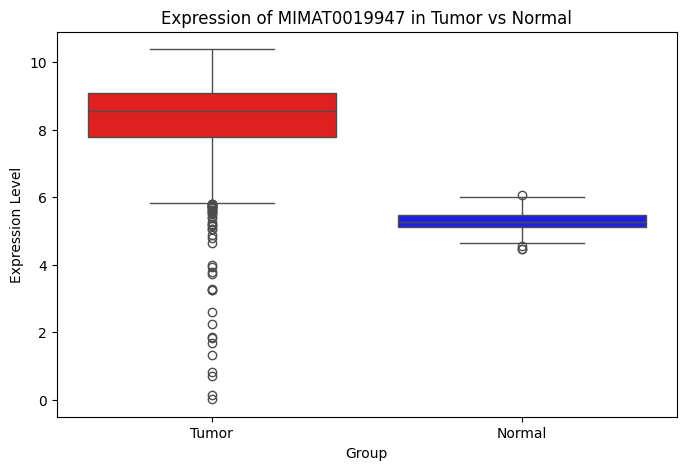

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Проверить наличие данных
print("Tumor samples:", len(tumor_expr.loc[top_mirna]))
print("Normal samples:", len(normal_expr.loc[top_mirna]))

# Альтернативный способ построения
plt.figure(figsize=(8, 5))
data = pd.DataFrame({
    'Expression': pd.concat([tumor_expr.loc[top_mirna], normal_expr.loc[top_mirna]]),
    'Group': ['Tumor']*len(tumor_expr.loc[top_mirna]) + ['Normal']*len(normal_expr.loc[top_mirna])
})
sns.boxplot(x='Group', y='Expression', data=data, palette={"Tumor": "red", "Normal": "blue"})
plt.ylabel("Expression Level")
plt.title(f"Expression of {top_mirna} in Tumor vs Normal")
plt.show()

In [ ]:
# В опухолевой ткани (Tumor) экспрессия miRNA значительно выше, чем в нормальной ткани.
# В нормальной ткани (Normal) уровень экспрессии гораздо ниже и стабильнее.
# В опухолевой ткани есть много выбросов (низкие значения экспрессии), что говорит о гетерогенности данных.

In [25]:
print(tumor_expr.loc[top_mirna])
print(normal_expr.loc[top_mirna])


name
GSM3106847    5.981
GSM3106848    7.899
GSM3106849    7.220
GSM3106850    8.457
GSM3106851    8.023
              ...  
GSM3107823    8.248
GSM3107824    8.578
GSM3107825    9.156
GSM3107826    8.478
GSM3107827    6.859
Name: MIMAT0019947, Length: 872, dtype: float64
name
GSM3107239    4.816
GSM3107240    4.645
GSM3107241    4.465
GSM3107242    5.461
GSM3107243    5.466
              ...  
GSM3107343    5.598
GSM3107344    5.355
GSM3107345    5.099
GSM3107346    5.721
GSM3107347    5.064
Name: MIMAT0019947, Length: 100, dtype: float64


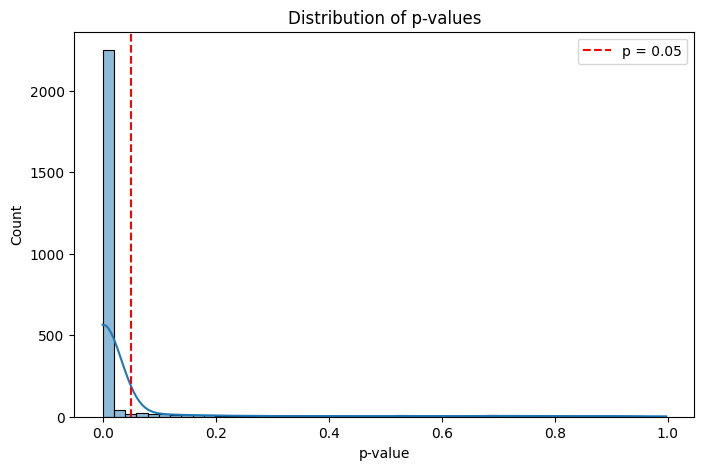

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(summary_stats["p_value"], bins=50, kde=True)
plt.axvline(x=0.05, color="red", linestyle="--", label="p = 0.05")
plt.xlabel("p-value")
plt.ylabel("Count")
plt.title("Distribution of p-values")
plt.legend()
plt.show()

In [ ]:
significant_mirnas = summary_stats[summary_stats["p_value"] < 0.05]
print(f"Число значимых miRNA: {significant_mirnas.shape[0]}")
print(significant_mirnas.head(10)) # поправка на множественность Бенджамина Хохберга

Число значимых miRNA: 2300
              Tumor_Mean  Tumor_Std  Normal_Mean  Normal_Std        p_value
ID_REF                                                                     
MIMAT0019947    8.209356   1.360250      5.29784    0.326907  2.445557e-224
MIMAT0015064    5.542531   1.458599      8.02794    0.394278  1.265492e-156
MIMAT0005866    4.139508   1.975395      6.65579    0.369995  8.629146e-152
MIMAT0005951    8.195003   1.368868      5.35510    0.494731  3.735324e-132
MIMAT0027614    2.965804   2.225281      5.71592    0.536045  1.307175e-120
MIMAT0019071   13.623422   1.220014     11.19383    0.462169  8.919880e-120
MIMAT0019710    2.618775   2.309214      5.63504    0.635507  2.959844e-113
MIMAT0027474    9.342542   0.803442      7.93360    0.300468  4.954639e-108
MIMAT0019229   11.035920   0.397033     12.10378    0.199412  5.123107e-107
MIMAT0003326   12.372509   0.583697     10.47949    0.351270   3.654069e-99


In [27]:
from statsmodels.stats.multitest import multipletests

# Применяем поправку Бенджамини-Хохберга
summary_stats["p_adj"] = multipletests(summary_stats["p_value"], method="fdr_bh")[1]

# Фильтруем значимые miRNA с учетом скорректированных p-значений
significant_mirnas = summary_stats[summary_stats["p_adj"] < 0.05]

print(f"Число значимых miRNA после поправки BH: {significant_mirnas.shape[0]}")
print(significant_mirnas.head(10))


Число значимых miRNA после поправки BH: 2296
              Tumor_Mean  Tumor_Std  Normal_Mean  Normal_Std        p_value  \
ID_REF                                                                        
MIMAT0019947    8.209356   1.360250      5.29784    0.326907  2.445557e-224   
MIMAT0015064    5.542531   1.458599      8.02794    0.394278  1.265492e-156   
MIMAT0005866    4.139508   1.975395      6.65579    0.369995  8.629146e-152   
MIMAT0005951    8.195003   1.368868      5.35510    0.494731  3.735324e-132   
MIMAT0027614    2.965804   2.225281      5.71592    0.536045  1.307175e-120   
MIMAT0019071   13.623422   1.220014     11.19383    0.462169  8.919880e-120   
MIMAT0019710    2.618775   2.309214      5.63504    0.635507  2.959844e-113   
MIMAT0027474    9.342542   0.803442      7.93360    0.300468  4.954639e-108   
MIMAT0019229   11.035920   0.397033     12.10378    0.199412  5.123107e-107   
MIMAT0003326   12.372509   0.583697     10.47949    0.351270   3.654069e-99   

      

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


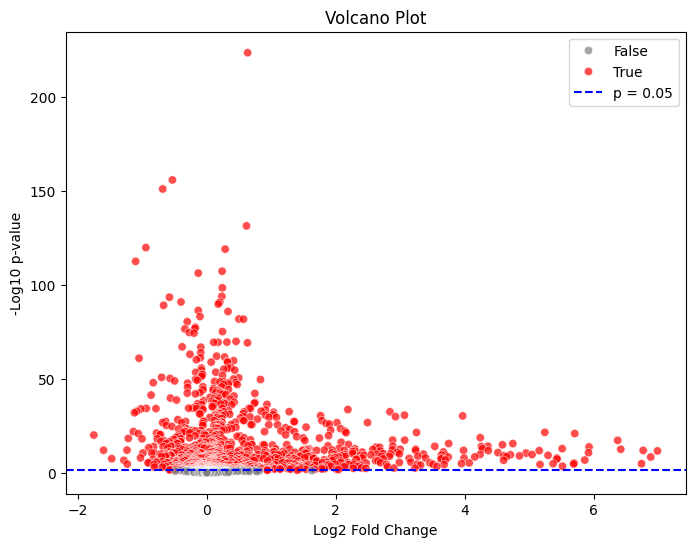

In [28]:
import numpy as np

summary_stats["log2FC"] = np.log2(summary_stats["Tumor_Mean"] / summary_stats["Normal_Mean"])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=summary_stats, x="log2FC", y=-np.log10(summary_stats["p_value"]),
                hue=summary_stats["p_value"] < 0.05, palette={True: "red", False: "gray"}, alpha=0.7)
plt.axhline(y=-np.log10(0.05), color="blue", linestyle="--", label="p = 0.05")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 p-value")
plt.title("Volcano Plot")
plt.legend()
plt.show() # отсечение по абсциссе mod 2 и 4

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


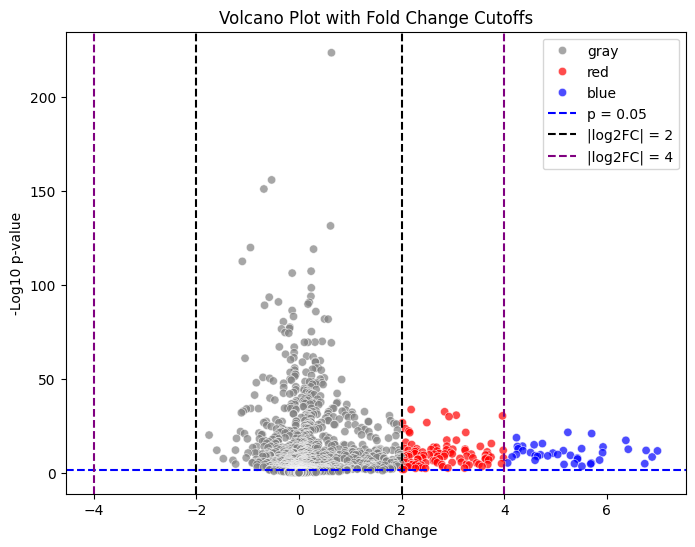

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем log2 Fold Change
summary_stats["log2FC"] = np.log2(summary_stats["Tumor_Mean"] / summary_stats["Normal_Mean"])

# Создаем категории для log2FC
conditions = [
    (abs(summary_stats["log2FC"]) < 2),
    ((abs(summary_stats["log2FC"]) >= 2) & (abs(summary_stats["log2FC"]) < 4)),
    (abs(summary_stats["log2FC"]) >= 4)
]
colors = ["gray", "red", "blue"]
summary_stats["Category"] = np.select(conditions, colors, default="gray")

# Рисуем Volcano Plot с выделением
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=summary_stats, x="log2FC", y=-np.log10(summary_stats["p_value"]),
    hue=summary_stats["Category"], palette={"gray": "gray", "red": "red", "blue": "blue"},
    alpha=0.7
)
plt.axhline(y=-np.log10(0.05), color="blue", linestyle="--", label="p = 0.05")
plt.axvline(x=2, color="black", linestyle="--", label="|log2FC| = 2")
plt.axvline(x=-2, color="black", linestyle="--")
plt.axvline(x=4, color="purple", linestyle="--", label="|log2FC| = 4")
plt.axvline(x=-4, color="purple", linestyle="--")

plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 p-value")
plt.title("Volcano Plot with Fold Change Cutoffs")
plt.legend()
plt.show()

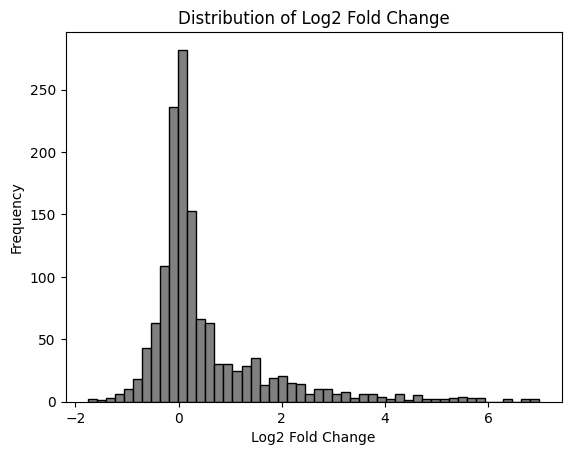

In [37]:
import matplotlib.pyplot as plt

plt.hist(summary_stats["log2FC"], bins=50, color="gray", edgecolor="black")
plt.xlabel("Log2 Fold Change")
plt.ylabel("Frequency")
plt.title("Distribution of Log2 Fold Change")
plt.show()
# Сильно отрицательных микроРНК не выделяется, но есть приближенные к ним (возможно супрессорные)

In [39]:
print("Summary stats indices:", summary_stats.index[:10])  # Выведем первые 10 индексов
print("Tumor expr indices:", tumor_expr.index[:10])
print("Normal expr indices:", normal_expr.index[:10])

Summary stats indices: RangeIndex(start=0, stop=10, step=1)
Tumor expr indices: Index(['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064', 'MIMAT0000065',
       'MIMAT0000066', 'MIMAT0000067', 'MIMAT0000068', 'MIMAT0000069',
       'MIMAT0000070', 'MIMAT0000071'],
      dtype='object', name='ID_REF')
Normal expr indices: Index(['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064', 'MIMAT0000065',
       'MIMAT0000066', 'MIMAT0000067', 'MIMAT0000068', 'MIMAT0000069',
       'MIMAT0000070', 'MIMAT0000071'],
      dtype='object', name='ID_REF')


In [40]:
tumor_expr.index = tumor_expr.index.astype(str)
normal_expr.index = normal_expr.index.astype(str)
summary_stats.index = summary_stats.index.astype(str)

In [41]:
print(summary_stats.nsmallest(5, "log2FC"))


          miRNA_ID  Tumor_Mean  Tumor_Std  Normal_Mean  Normal_Std  \
750   MIMAT0004592    1.229903   2.192065      4.14642    2.445870   
1364  MIMAT0027461    0.769120   1.843047      2.33565    1.869606   
1749  MIMAT0027666    0.729997   1.822863      2.02989    2.107402   
1816  MIMAT0024617    0.872186   1.897281      2.12807    2.198490   
1358  MIMAT0018121    1.219377   2.023580      2.87827    1.968441   

           p_value         p_adj    log2FC Category  
750   8.951719e-21  3.057411e-20 -1.753322     gray  
1364  1.069960e-12  2.010585e-12 -1.602543     gray  
1749  3.320442e-08  4.866820e-08 -1.475440     gray  
1816  2.458575e-07  3.470691e-07 -1.286838     gray  
1358  9.281129e-13  1.751736e-12 -1.239057     gray  


In [30]:
print(summary_stats.columns)

Index(['Tumor_Mean', 'Tumor_Std', 'Normal_Mean', 'Normal_Std', 'p_value',
       'p_adj', 'log2FC', 'Category'],
      dtype='object')


In [32]:
summary_stats = summary_stats.reset_index().rename(columns={"ID_REF": "miRNA_ID"})

In [31]:
print(summary_stats.index[:10])  # Выведем первые 10 значений индекса

Index(['MIMAT0019947', 'MIMAT0015064', 'MIMAT0005866', 'MIMAT0005951',
       'MIMAT0027614', 'MIMAT0019071', 'MIMAT0019710', 'MIMAT0027474',
       'MIMAT0019229', 'MIMAT0003326'],
      dtype='object', name='ID_REF')


In [33]:
import pandas as pd
blue_miRNAs = summary_stats[
    (summary_stats["log2FC"].abs() >= 4) & (summary_stats["p_value"] < 0.05)
]

print(blue_miRNAs[["miRNA_ID", "log2FC", "p_value"]])

          miRNA_ID    log2FC       p_value
675   MIMAT0000079  5.240967  3.111735e-22
704   MIMAT0000419  5.705000  1.408363e-21
846   MIMAT0000085  4.239101  2.155713e-19
954   MIMAT0004517  6.371348  5.642228e-18
1077  MIMAT0016893  4.744525  3.033542e-16
1121  MIMAT0003256  4.583344  1.300795e-15
1175  MIMAT0000074  4.357682  7.271025e-15
1189  MIMAT0000761  4.256651  1.130569e-14
1213  MIMAT0001635  5.926773  1.827358e-14
1290  MIMAT0002851  5.509487  1.548386e-13
1295  MIMAT0000070  4.271675  1.794453e-13
1322  MIMAT0002863  6.418500  3.225222e-13
1373  MIMAT0019363  6.766321  1.350554e-12
1382  MIMAT0001625  4.363363  1.661682e-12
1384  MIMAT0017981  5.153830  1.763533e-12
1395  MIMAT0000687  6.987838  2.414726e-12
1468  MIMAT0019221  4.512997  1.847068e-11
1476  MIMAT0003309  5.918348  2.181826e-11
1493  MIMAT0000617  4.949413  3.432811e-11
1552  MIMAT0001341  4.236782  1.910224e-10
1556  MIMAT0000460  5.042527  2.067662e-10
1568  MIMAT0004502  4.706910  2.771634e-10
1597  MIMAT

In [34]:
import pandas as pd

# Фильтрация красных miRNA (2 ≤ log2FC < 4, p-value < 0.05)
red_miRNAs = summary_stats[
    (summary_stats["log2FC"] >= 2) & (summary_stats["log2FC"] < 4) & (summary_stats["p_value"] < 0.05)
]

# Устанавливаем максимальное количество строк для вывода
pd.set_option("display.max_rows", None)

# Выводим полный список
print(red_miRNAs[["miRNA_ID", "log2FC", "p_value"]])

# Вывод количества таких miRNA
print(f"\nВсего 'красных' miRNA: {red_miRNAs.shape[0]}")

                                               miRNA_ID    log2FC  \
233                                        MIMAT0005898  2.185997   
254                                        MIMAT0000440  2.838907   
298                                        MIMAT0000100  3.064687   
309                                        MIMAT0015072  3.966682   
320                                        MIMAT0019716  2.924528   
422                                        MIMAT0006764  2.491500   
424                                        MIMAT0019925  2.016786   
580                                        MIMAT0019896  2.072878   
634                                        MIMAT0000422  2.141093   
679                                        MIMAT0000104  3.250637   
685   MIMAT0002831, MIMAT0005449, MIMAT0005450, MIMA...  2.158271   
941                                        MIMAT0000417  2.880815   
945                                        MIMAT0004901  3.067598   
1035                              

In [35]:
# Сохраняем данные в CSV-файл
blue_miRNAs.to_csv("blue_miRNAs.csv", index=False)

print("Файл 'blue_miRNAs.csv' успешно сохранен!")

Файл 'blue_miRNAs.csv' успешно сохранен!


In [36]:
# Сохраняем данные в CSV-файл
red_miRNAs.to_csv("red_miRNAs.csv", index=False)

print("Файл 'red_miRNAs.csv' успешно сохранен!")

Файл 'red_miRNAs.csv' успешно сохранен!
